In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

In [2]:
duration = 1
fs = 400
samples = int(fs * duration)
t = np.arange(samples) / fs

In [3]:
# Create a chirp from 20-100 Hz and apply amplitude modulation
signal = chirp(t, 20, t[-1], 100)
signal *= (1 + 0.5 * np.sin(2 * np.pi * 3 * t))

In [4]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2 * np.pi) * fs

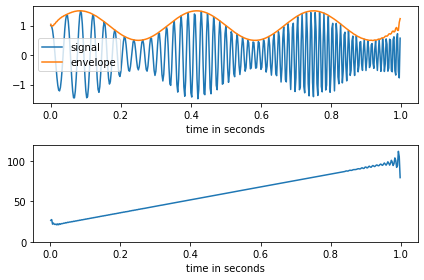

In [5]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0, 120)
fig.tight_layout()